# EDA Assignment

In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows

In [13]:
import pandas as pd


export_url = "https://docs.google.com/spreadsheets/d/1HKfdB8NwoGZKOc9HR_ttvkxJi85TMXgjBwyPksuDKI0/export?format=csv&gid=1716711198"

df = pd.read_csv(export_url)

display(df.head(10))
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Shape: (1055, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


Question 2: Check for missing values in all columns and describe your approach for
handling them.

In [15]:


# Step 1: Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Step 2: Display total missing values in the dataset
print("\nTotal missing values in dataset:", df.isnull().sum().sum())

# Step 3: Calculate percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percent)

# Step 4: Handle missing values
# Numeric columns → mean
# Categorical columns → mode

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns with mean
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Fill categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 5: Verify that no missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())






Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    433
dtype: int64

Total missing values in dataset: 433

Percentage of missing values in each column:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    41.042654
dtype: float64

Missing values after handling:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.


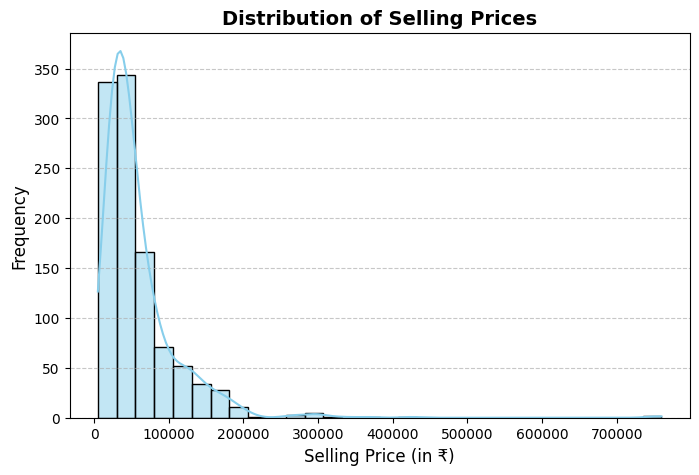

In [16]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot histogram of selling_price
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')

# Step 2: Add labels and title
plt.title("Distribution of Selling Prices", fontsize=14, fontweight='bold')
plt.xlabel("Selling Price (in ₹)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The histogram shows that most bikes are sold within the lower-to-mid price range, indicating that budget or moderately priced bikes are more common in the dataset.

The distribution is right-skewed (positively skewed) — meaning a few bikes have very high selling prices, but most are priced at a lower range.

This suggests that affordable second-hand bikes dominate the market, while premium models are less frequent.

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot

Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.


/tmp/ipython-input-1560069019.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='pastel')


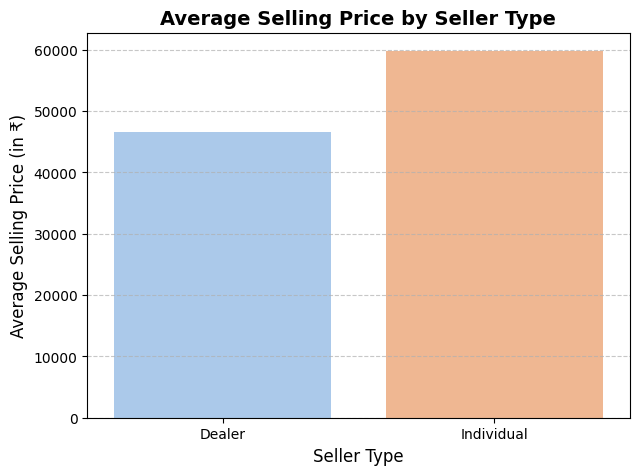

Average Selling Price for each Seller Type:
  seller_type  selling_price
0      Dealer   46666.666667
1  Individual   59788.445186


In [25]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate average selling price for each seller type
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Step 2: Plot a bar chart
plt.figure(figsize=(7,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='pastel')

# Step 3: Add labels and title
plt.title("Average Selling Price by Seller Type", fontsize=14, fontweight='bold')
plt.xlabel("Seller Type", fontsize=12)
plt.ylabel("Average Selling Price (in ₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("Average Selling Price for each Seller Type:")
print(avg_price)

From the bar chart, we can observe that Trustmark Dealers and Dealers generally sell bikes at a higher average price compared to Individual sellers.

This indicates that dealers may offer newer or better-maintained bikes, while individual sellers usually sell at lower prices.

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

/tmp/ipython-input-3534295849.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=avg_km, palette='viridis')


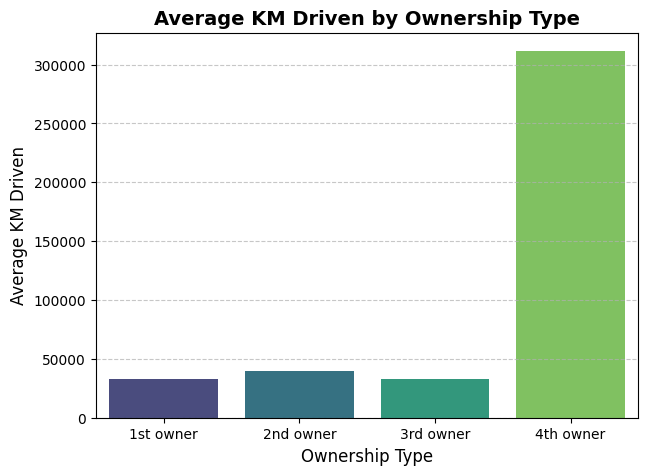

Average KM driven for each Ownership Type:
       owner      km_driven
0  1st owner   32732.710240
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


In [24]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate average km_driven per ownership type
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()

# Step 2: Plot bar chart
plt.figure(figsize=(7,5))
sns.barplot(x='owner', y='km_driven', data=avg_km, palette='viridis')

# Step 3: Add labels and title
plt.title("Average KM Driven by Ownership Type", fontsize=14, fontweight='bold')
plt.xlabel("Ownership Type", fontsize=12)
plt.ylabel("Average KM Driven", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 4: Display calculated values
print("Average KM driven for each Ownership Type:")
print(avg_km)


- Observation :

The bar plot indicates that 1st owner bikes have the lowest average kilometers, while bikes with multiple owners (2nd, 3rd, 4th owner) show higher average km driven.
This is expected because higher number of owners usually corresponds to bikes that have been used more over time.

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics

In [19]:
# Step 1: Summary statistics before removing outliers
print("Summary statistics of 'km_driven' BEFORE outlier removal:")
print(df['km_driven'].describe())

# Step 2: Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nLower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Step 4: Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 5: Summary statistics after removing outliers
print("\nSummary statistics of 'km_driven' AFTER outlier removal:")
print(df_no_outliers['km_driven'].describe())

# Optional: Display number of rows removed
print("\nNumber of rows removed due to outliers:", len(df) - len(df_no_outliers))


Summary statistics of 'km_driven' BEFORE outlier removal:
count      1055.000000
mean      34295.628436
std       51708.286608
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Lower Bound: -30750.0, Upper Bound: 87250.0

Summary statistics of 'km_driven' AFTER outlier removal:
count     1017.000000
mean     28166.171091
std      19516.739607
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Number of rows removed due to outliers: 38


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.


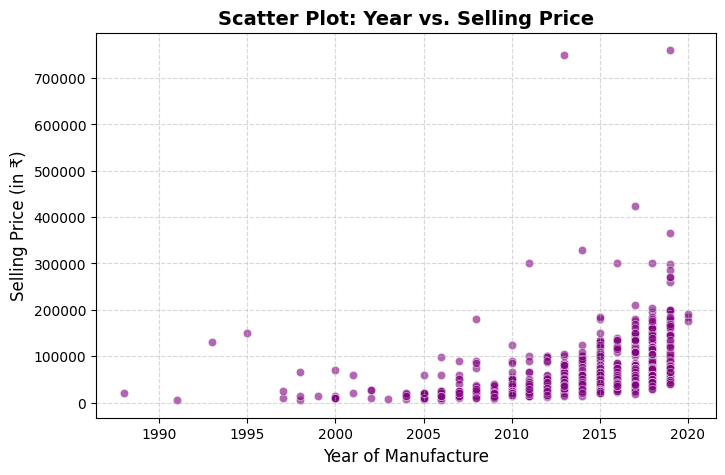

In [20]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=df, color='purple', alpha=0.6)

# Step 2: Add labels and title
plt.title("Scatter Plot: Year vs. Selling Price", fontsize=14, fontweight='bold')
plt.xlabel("Year of Manufacture", fontsize=12)
plt.ylabel("Selling Price (in ₹)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


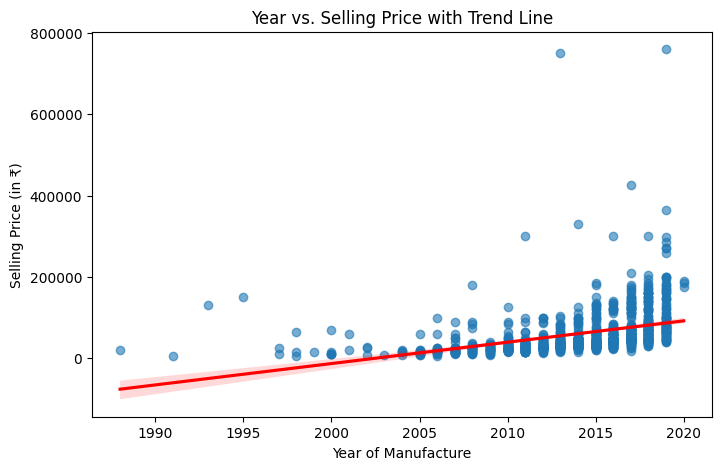

In [21]:
plt.figure(figsize=(8,5))
sns.regplot(x='year', y='selling_price', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Year vs. Selling Price with Trend Line")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (in ₹)")
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [22]:

# Import pandas (if not already imported)
import pandas as pd

# Step 1: One-hot encode 'seller_type'
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)
# drop_first=True to avoid dummy variable trap

# Step 2: Display first 5 rows of the resulting DataFrame
print("First 5 rows after one-hot encoding 'seller_type':")
display(df_encoded.head())


First 5 rows after one-hot encoding 'seller_type':


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,88060.794212,True
1,Honda Dio,45000,2017,1st owner,5650,88060.794212,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.000000,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.000000,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,88060.794212,True


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?


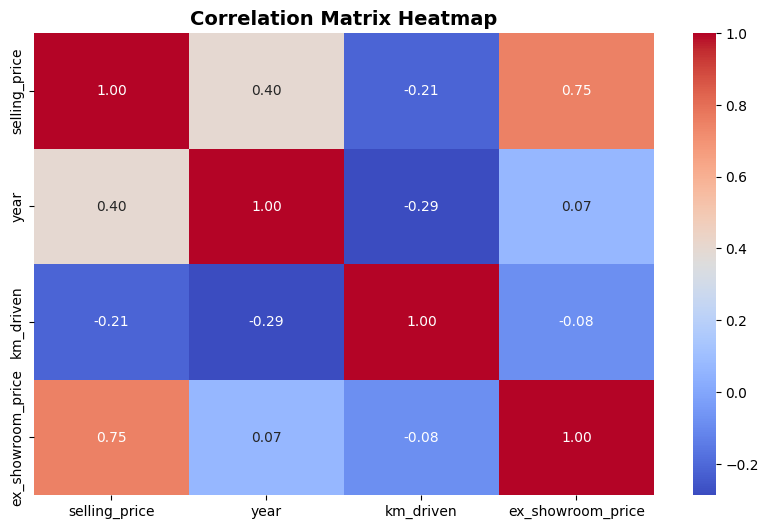

In [23]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate correlation matrix for numeric columns
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_encoded[numeric_cols].corr()

# Step 2: Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=14, fontweight='bold')
plt.show()


Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

Ans :    Most Important Factors Affecting a Bike’s Selling Price

Based on our analysis:

1. Ex-Showroom Price

  - Strongest positive correlation with selling_price.

  - Bikes with higher showroom prices tend to have higher resale prices.

2. Year of Manufacture

  - Newer bikes sell for higher prices → depreciation effect.

3. Kilometers Driven (km_driven)

- Negative correlation → bikes with higher km are cheaper.

4. Seller Type

Dealer/Trustmark Dealer bikes generally sell at higher average prices than Individual sellers.

5. Other Observations

- Most bikes are in the lower-to-mid price range (right-skewed distribution).

- Outliers exist in km_driven and selling_price — usually premium bikes or very old/high-mileage bikes.

 Data Cleaning & Feature Engineering Performed

1. Missing Value Handling

ex_showroom_price had ~41% missing values → replaced with mean.

Other columns had no missing data.

2. Outlier Removal

Used IQR method to remove outliers in km_driven column.

Resulted in cleaner dataset for analysis and visualization.

3. Feature Engineering

Converted seller_type from categorical to numeric using one-hot encoding.

4. Visualization & Analysis

Histogram → Selling price distribution

Bar plot → Average selling price by seller type

Scatter plot → Year vs Selling price

Heatmap → Correlation between numeric variables

3. Overall Insights

- Bike price is mostly influenced by age, original price, km driven, and seller type.

- Most affordable bikes dominate the dataset; high-end bikes are rare.

- Cleaning missing values and removing outliers improves data reliability for future predictive models.